# Colorspaces & Thresholding

Today, we are going to learn more about manipulte images!

In [2]:
# run this cell to download images
!rm -r ai4all2020-michigan
!git clone https://github.com/ddshan/ai4all2020-michigan
!cp -r ai4all2020-michigan/* . && echo "=== Download Images Successfully ==="

rm: cannot remove 'ai4all2020-michigan': No such file or directory
Cloning into 'ai4all2020-michigan'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 5), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (22/22), done.
=== Download Images Successfully ===


# Part1: Image Colorspaces

There are more than 150 color-space conversion methods available in OpenCV. But we will look into 1 which is very widely used, BGR -> Gray. Besides this one, there is another one, BRG -> RGB, which is also very frequently used.

For color conversion, we use the function **cv2.cvtColor(input_image, flag)** where flag determines the type of conversion.

* For BGR -> Gray conversion, we use the flags **cv2.COLOR_BGR2GRAY**.

* For BGR -> RGB conversion, we use the flags **cv2.COLOR_BGR2RGB**.

Let's see a cat picture, and see what it looks like in differnt colorspace.




image shape = (800, 1200, 3)


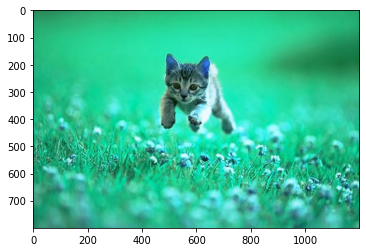

In [3]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpeg')
plt.imshow(img)
print('image shape =', img.shape)
# Does this image display below look weird to you?

image shape = (800, 1200, 3)


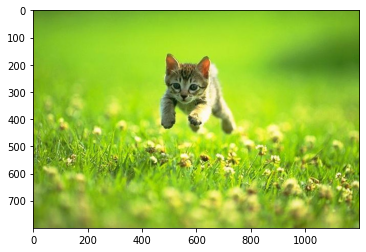

In [ ]:
# convert BGR to RGB
img = cv2.imread('cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print('image shape =', img.shape)

image shape = (800, 1200)


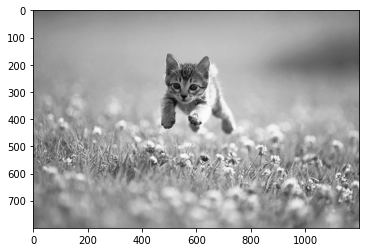

In [ ]:
img = cv2.imread('cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, 'gray')
print('image shape =', img.shape)

# Part2: Image Thresholding


## 2.1 Use Thresholding from OpenCV

Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). 

The function used is cv2.threshold. 

* 1st argument is the **source image**, which should be a grayscale image. 
* 2nd argument is the **threshold value** which is used to classify the pixel values. 
* 3rd argument is the **maxVal** which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 
* 4th argument decides the thresholding **function**. OpenCV provides different styles of thresholding. Different types are:
    * cv2.THRESH_BINARY
    * cv2.THRESH_BINARY_INV
    * cv2.THRESH_TRUNC

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gradient.png', 0)
# use 3 thresholding methods provided by opencv
_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
print('Executed Successfully')

Executed Successfully


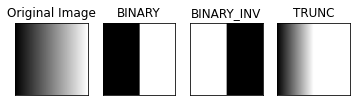

In [ ]:
# plot results
titles = ['Original Image','BINARY','BINARY_INV','TRUNC']
images = [img, thresh1, thresh2, thresh3]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 2.2 Create Thresholding Methods

OpenCV provides thresholding functions for us, which is very easy to use. But we have already know the idea behind it, so we can write our own thresholding methods instead.


In [ ]:
# first read original image and output shape
img = cv2.imread('gradient.png',0)
height, width = img.shape
print('image shape is', img.shape)

image shape is (510, 510)


My replication of **BINARY** thresholding

This is my replication of BINARY thresholding
Here is my result:


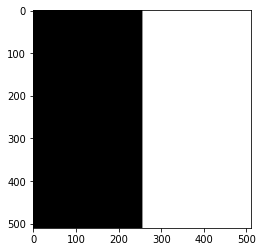

In [ ]:
# (1) create our own binary thresholding
print(f'This is my replication of BINARY thresholding')
print(f'Here is my result:')
img_new1 = img.copy()
for i in range(height):
  for j in range(width):
    if img_new1[i, j] > 127:
      img_new1[i, j] = 255
    else:
      img_new1[i, j] = 0
plt.imshow(img_new1, 'gray')

My replication of **BINARY_INV** thresholding

This is my replication of BINARY_INV thresholding
Here is my result:


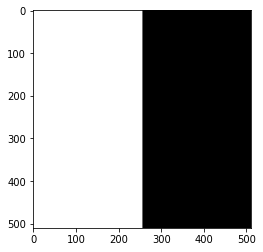

In [ ]:
# (2) create our own BINARY_INV thresholding
print(f'This is my replication of BINARY_INV thresholding')
print(f'Here is my result:')
img_new2 = img.copy()
for i in range(height):
  for j in range(width):
    if img_new2[i, j] > 127:
      img_new2[i, j] = 0
    else:
      img_new2[i, j] = 255
plt.imshow(img_new2, 'gray')

My replication of **TRUNC** thresholding

This is my replication of TRUNC thresholding
Here is my result:


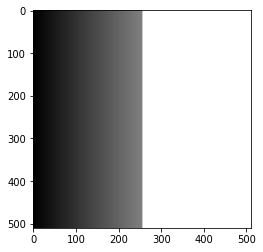

In [ ]:
# (3) create our own TRUNC thresholding
print(f'This is my replication of TRUNC thresholding')
print(f'Here is my result:')
img_new3 = img.copy()
for i in range(height):
  for j in range(width):
    if img_new3[i, j] > 127:
      img_new3[i, j] = 255
    # else:
    #   img[i, j] = img[i, j]
plt.imshow(img_new3, 'gray')

# Part3: Application Using Thresholding

Here, we have a image of traffice light. Can you try to extract the region of the right/yellow/green light?


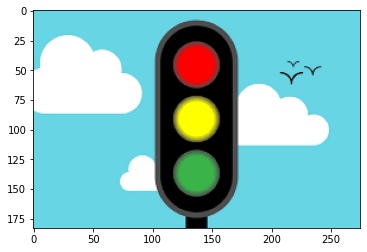

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('light.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
# define range of red color in RGB
# lower = np.array([200,0,0])
# upper = np.array([255,50,50])

# define range of yellow color in RGB
# lower = np.array([200,200,0])
# upper = np.array([255,255,50])

# define range of green color in RGB
lower = np.array([0,170,0])
upper = np.array([100,255,100])

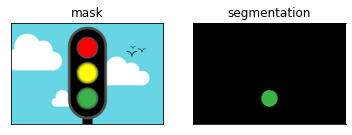

In [6]:
# Threshold the RGB image to get only red colors
mask = cv2.inRange(img, lower, upper)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask= mask)

# plot results
titles = ['mask','segmentation']
images = [mask, res]
for i in range(2):
    plt.subplot(1,2,i+1)
    if i == 0 :
      plt.imshow(img)
    elif i == 1:
      plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Supplementary

Can you reuse some of the code above to only segment the sky or the cloud?

**exercise 1**: Sky Segmentation

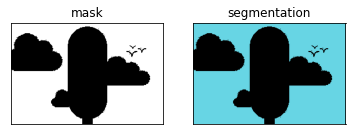

In [ ]:
# define color range rgb(103, 213, 228)
lower = np.array([100, 200, 200])
upper = np.array([120, 220, 250])

# Threshold the RGB image to get the color
mask = cv2.inRange(img, lower, upper)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask= mask)

# plot results
titles = ['mask','segmentation']
images = [mask, res]
for i in range(2):
    plt.subplot(1,2,i+1)
    if i == 0 :
      plt.imshow(images[i],'gray')
    elif i == 1:
      plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**exercise 2**: Cloud Segmentation

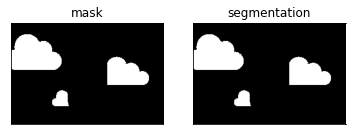

In [ ]:
# define color range 
lower = np.array([250, 250, 250])
upper = np.array([255, 255, 255])

# Threshold the RGB image to get the color
mask = cv2.inRange(img, lower, upper)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask= mask)

# plot results
titles = ['mask','segmentation']
images = [mask, res]
for i in range(2):
    plt.subplot(1,2,i+1)
    if i == 0 :
      plt.imshow(images[i],'gray')
    elif i == 1:
      plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()